In [1]:
import numpy as np
import cupy as cp
from numba import jit, prange
import timeit
import matplotlib.pyplot as plt

In [2]:
def divide_base(a, b):
    c = np.divide(a, b)

def divide_cp(a, b):
    c = cp.divide(a, b)
    
@jit(nopython=True)
def divide_nb(a, b):
    c = np.divide(a, b)
    
@jit(nopython=True, parallel=True)
def divide_nb_parallel(a, b):
    c = np.divide(a, b)

In [3]:
N = [int(8*2**i) for i in range(17)]
methods = ["base", "cp", "nb", "nb_parallel"]
K = len(methods)
funcs = [divide_base, divide_cp, divide_nb, divide_nb_parallel]
T = [[] for i in range(K)]
for n in N:
    print("Start with size:", n)
    a = np.random.rand(n, 1)
    b = np.random.rand(n, 1)
    ca = cp.array(a)
    cb = cp.array(b)
    
    args = [(a,b), (ca,cb), (a,b), (a,b)]
    
    for i in range(K):
        t = %timeit -q -n 1 -r 3 -o funcs[i](*args[i])
        T[i].append(t.average*1000)

Start with size: 8
Start with size: 16
Start with size: 32
Start with size: 64
Start with size: 128
Start with size: 256
Start with size: 512
Start with size: 1024
Start with size: 2048
Start with size: 4096
Start with size: 8192
Start with size: 16384
Start with size: 32768
Start with size: 65536
Start with size: 131072
Start with size: 262144
Start with size: 524288


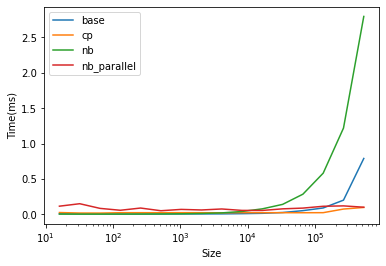

In [4]:
for i in range(K):
    plt.plot(N[1:], T[i][1:], label=methods[i])
plt.xlabel("Size")
plt.ylabel("Time(ms)")
plt.legend()
plt.xscale('log')
plt.show()

In [5]:
print(T)

[[0.01834366670057837, 0.006022333309374517, 0.0036186665965942666, 0.0033399999968726965, 0.0022803331679218295, 0.002317333534544256, 0.002826666483694377, 0.0031783332209064006, 0.00380000013440925, 0.004860333319811616, 0.007603666896708698, 0.012579333239652138, 0.023954666782325756, 0.050338000013046745, 0.0883356666842398, 0.19886399998843748, 0.7884086665702247], [25.001943333336385, 0.023597333286791883, 0.016592000065429602, 0.01595599997017416, 0.021283000023686327, 0.02135633333940253, 0.021012000161135802, 0.021569333208996493, 0.021130666785514524, 0.020250000185721245, 0.022039666722169688, 0.021409666563461844, 0.021451666574042367, 0.020778333237103652, 0.021749999935612625, 0.07287066667534721, 0.09561866666748149], [56.92456166661941, 0.0014196666597854346, 0.0012666666104147832, 0.0013396667479052364, 0.0018139999156119302, 0.002257333259573594, 0.0035153332949751834, 0.0059473333446173155, 0.010396333588384246, 0.018587666697082266, 0.03857433315109423, 0.075654999